# Compute weekly cyclists

Compute the weekly average cyclists a bike counter sees.

In [1]:
station = 'ECO09113499'
year = 2017

In [2]:
%matplotlib inline

import papermill as pm

import bikes

In [3]:
data = bikes.get_velo_data(station, year)

# Sanity Plots

These plots are useful for figuring out if something went wrong while executing this notebook. Useful when it is executed as part of a pipeline or batch job.

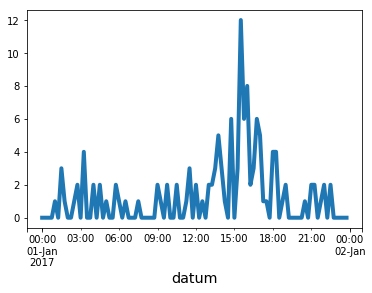

In [4]:
first_day = '%i0101' % year
data[:first_day].North.plot()

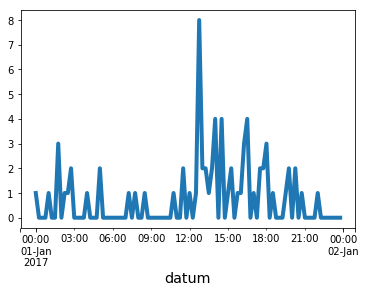

In [5]:
data[:first_day].South.plot()

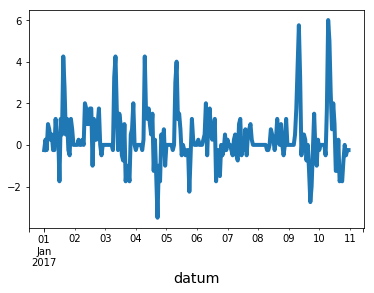

In [6]:
first = data[:'%i0110' % year]
hourly = first.resample('H').mean()
(hourly.North - hourly.South).plot()

## Weekly cyclists

Compute both total and average number of cyclists at the station per week.

In [7]:
average = data.resample('W').mean()
total = data.resample('W').sum()

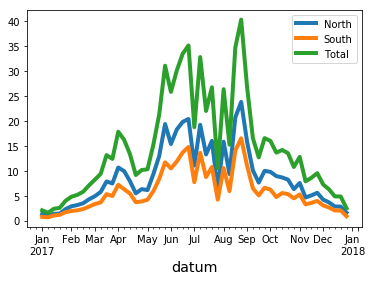

In [8]:
average.plot()

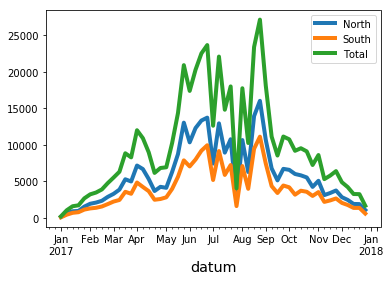

In [9]:
total.plot()

# Store Results

Store the key results for use in other notebooks.

In [11]:
pm.record("year", year)
pm.record("station", station)
pm.record("sum", dict(north=list(total.North),
                      south=list(total.North),
                      total=list(total.Total)))
pm.record("average", dict(north=list(average.North),
                          south=list(average.South),
                          total=list(average.Total)))
pm.record("index", list(average.index))